# Epidemics on Networks

https://epidemicsonnetworks.readthedocs.io/en/latest/EoN.html#simulation-investigation-toolkit

In [1]:
import EoN
import random
import networkx as nx
from tabulate import tabulate
import matplotlib.pyplot as plt

In [2]:
def plot_sir(t, S, I, R):
    plt.figure(figsize=(16,8))
    plt.plot(t, S, label="S", linewidth=3, color='g', alpha=0.5)
    plt.plot(t, I, label="I", linewidth=3, color='r', alpha=0.5)
    plt.plot(t, R, label="R", linewidth=3, color='b', alpha=0.5)
    plt.legend()
    plt.show()

# Fast SIR

https://epidemicsonnetworks.readthedocs.io/en/latest/functions/EoN.fast_SIR.html?highlight=fast_SIR

In [3]:
%%time

G = nx.configuration_model([1,5,10]*100000)
initial_size = 10000
gamma = 1.
tau = 0.4
t, S, I, R = EoN.fast_SIR(G, tau, gamma, initial_infecteds = range(initial_size))

CPU times: user 12.3 s, sys: 212 ms, total: 12.5 s
Wall time: 12.6 s


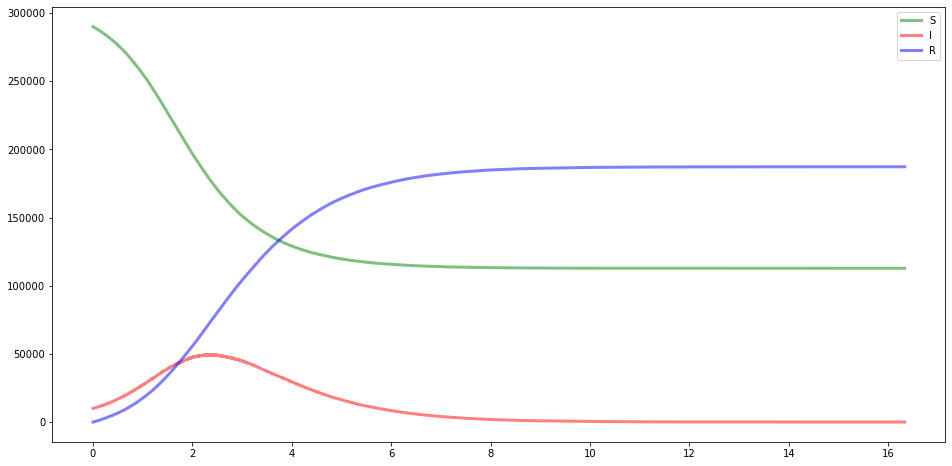

In [4]:
plot_sir(t, S, I, R)

# Gillespie SIR

https://epidemicsonnetworks.readthedocs.io/en/latest/functions/EoN.Gillespie_SIR.html#EoN.Gillespie_SIR

In [5]:
%%time

G = nx.configuration_model([1,5,10]*100000)
initial_size = 10000
gamma = 1.
tau = 0.3
t, S, I, R = EoN.Gillespie_SIR(G, tau, gamma, initial_infecteds = range(initial_size))

CPU times: user 9.46 s, sys: 224 ms, total: 9.69 s
Wall time: 9.77 s


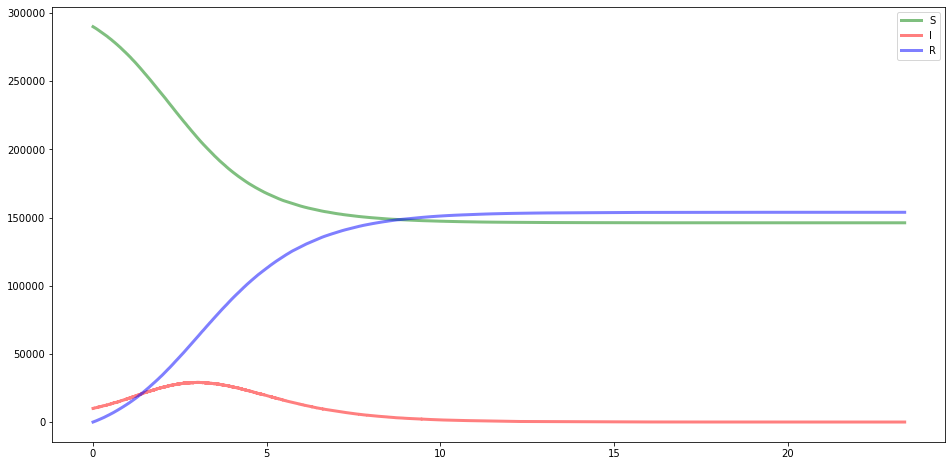

In [6]:
plot_sir(t, S, I, R)

# Basic Discrete SIR

https://epidemicsonnetworks.readthedocs.io/en/latest/functions/EoN.basic_discrete_SIR.html#EoN.basic_discrete_SIR

In [7]:
%%time

G = nx.fast_gnp_random_graph(1000,0.002)
t, S, I, R = EoN.basic_discrete_SIR(G, 0.6)

CPU times: user 358 ms, sys: 24 ms, total: 382 ms
Wall time: 381 ms


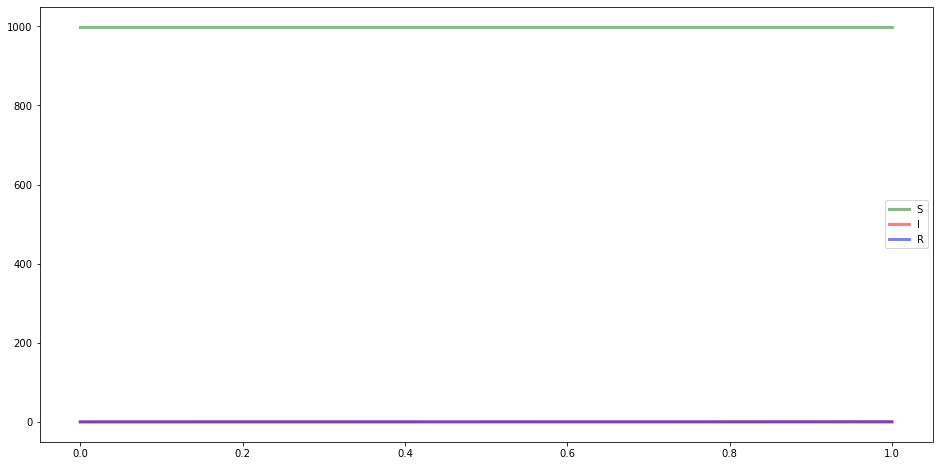

In [8]:
plot_sir(t, S, I, R)

# Discrete SIR

https://epidemicsonnetworks.readthedocs.io/en/latest/functions/EoN.discrete_SIR.html#EoN.discrete_SIR

In [9]:
%%time

G = nx.fast_gnp_random_graph(1000,0.002)
t, S, I, R = EoN.discrete_SIR(G, args = (0.6,), initial_infecteds=range(20))

CPU times: user 2.35 ms, sys: 0 ns, total: 2.35 ms
Wall time: 2.35 ms


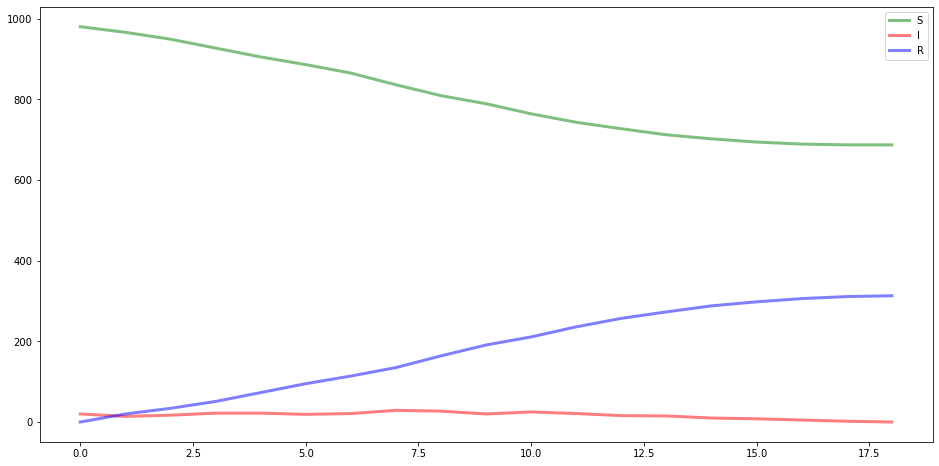

In [10]:
plot_sir(t, S, I, R)

# Fast non-Markov SIR

https://epidemicsonnetworks.readthedocs.io/en/latest/functions/EoN.fast_nonMarkov_SIR.html

In [18]:
%%time

N=1000000
G = nx.fast_gnp_random_graph(N, 5/(N-1.))

#set up the code to handle constant transmission rate
#with fixed recovery time.
def trans_time_fxn(source, target, rate):
    return random.expovariate(rate)

def rec_time_fxn(node,D):
    return D

D = 5
tau = 0.3
initial_inf_count = 100

t, S, I, R = EoN.fast_nonMarkov_SIR(G,
                        trans_time_fxn=trans_time_fxn,
                        rec_time_fxn=rec_time_fxn,
                        trans_time_args=(tau,),
                        rec_time_args=(D,),
                        initial_infecteds = range(initial_inf_count))

# note the comma after ``tau`` and ``D``.  This is needed for python
# to recognize these are tuples

# initial condition has first 100 nodes in G infected.

CPU times: user 37.6 s, sys: 408 ms, total: 38 s
Wall time: 38 s


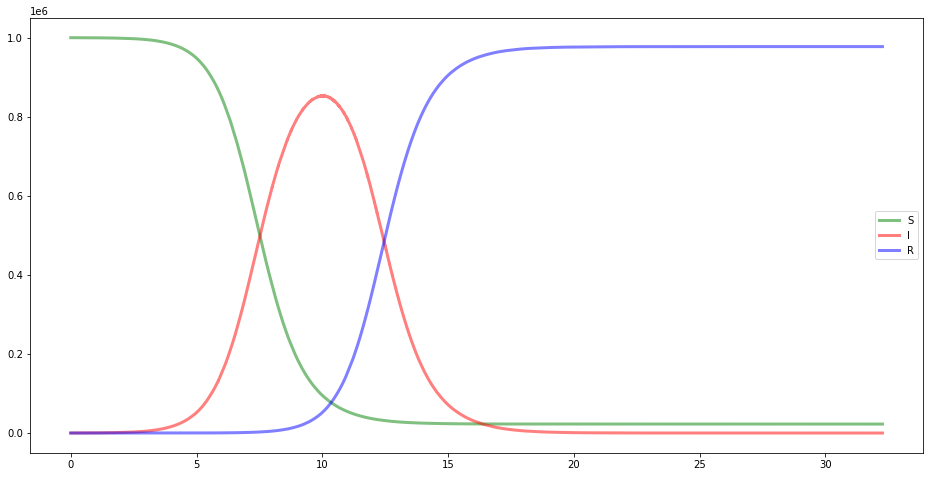

In [19]:
plot_sir(t, S, I, R)

# Get Infected Nodes

https://epidemicsonnetworks.readthedocs.io/en/latest/functions/EoN.get_infected_nodes.html#EoN.get_infected_nodes

In [20]:
%%time
#G = nx.fast_gnp_random_graph(5000,0.002)

finalR = EoN.get_infected_nodes(G, 2, 1, initial_infecteds=[0, 5])

CPU times: user 25.6 s, sys: 452 ms, total: 26 s
Wall time: 26.1 s


In [22]:
print(len(finalR))
print(G.number_of_nodes())

958924
1000000
